<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Hierarchical_Clustering_(EastWestAirlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
files=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
from pandas import read_excel
ewa = pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)



In [3]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(ewa.iloc[:,1:-1])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


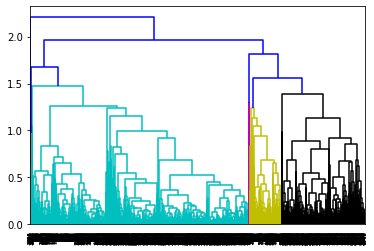

In [28]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

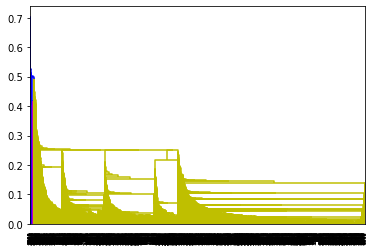

In [29]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

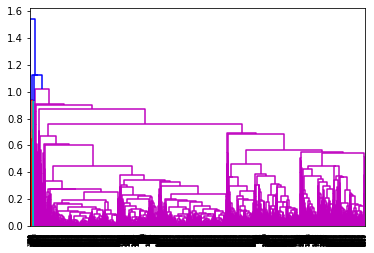

In [30]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

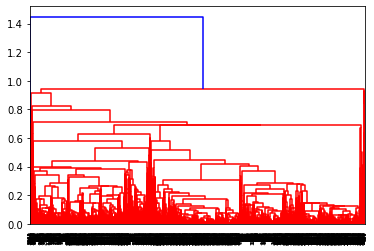

In [31]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

Since we are not able to get infrences from the dendrogram we can try with Elbow Chart to get the optimal number of clusters for this Dataset. Just for practical purspose I am trying this. In real time data we shouldn't use Hierarchial clustering for large data sets because of 2 reasons. 

1. Dendrogram wont give infrences for clusters
2. Computation time and resources are high

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([1185.5413391]),
 array([971.65673047]),
 array([879.60330363]),
 array([822.50668323]),
 array([766.01399718]),
 array([717.84157598])]

([<matplotlib.axis.XTick at 0x7f6505129438>,
 <a list of 6 Text major ticklabel objects>)

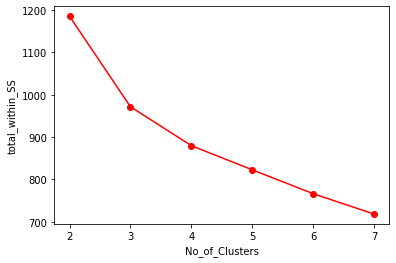

In [33]:
#Elbow Chart
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [34]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [35]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [36]:
ewa['h_clusterid'] = pd.DataFrame(y_hc)

In [37]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [38]:
#Grouping Data for predictions further 

result=ewa.iloc[:,1:-2].groupby(ewa.h_clusterid).mean()


In [39]:
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_clusterid,,,,,,,,,,
0,107121.805755,148.161151,3.666906,1.001439,1.033094,38980.861151,18.749640,476.129496,1.424460,4185.129496
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
2,55625.489827,141.643762,1.201152,1.021497,1.001152,5418.927447,7.699424,421.536660,1.272937,4085.983877


In [42]:
pip install kmodes

In [60]:
#Kmodes
from kmodes.kmodes import KModes

hc1 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

# save clusters for chart
y_hc1 = hc1.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])




Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 172, cost: 18390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 659, cost: 18137.0
Run 2, iteration: 2/100, moves: 3, cost: 18137.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 25, cost: 18219.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 70, cost: 18135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 213, cost: 18508.0
Best run was number 4


In [61]:
ewa['h_clusterid'] = pd.DataFrame(y_hc1)

In [62]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [63]:
#Grouping Data for predictions further 

result1=ewa.iloc[:,1:-2].groupby(ewa.h_clusterid).mean()

In [64]:
result1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_clusterid,,,,,,,,,,
0,63825.357350,152.615496,1.446778,1.020275,1.010138,11610.053584,8.884504,486.156770,1.462708,3947.842505
1,106291.764350,140.486405,3.805136,1.001511,1.022659,37260.989426,18.465257,462.774924,1.382175,4636.454683
2,82923.346087,107.457391,2.993043,1.001739,1.010435,20571.299130,16.753043,331.549565,0.935652,4342.339130


In [66]:
pip install pyclustering

     |████████████████████████████████| 2.6MB 9.2MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp36-none-any.whl size=2395105 sha256=a3f7b4bd7e151d841a42aba090b3dc97c4316c6416aad6f39a99eaab0fa6c3ba
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [12]:
from pyclustering.cluster.kmedians import kmedians

initial_medians = [[0.0, 0.1]]
kmedians_instance = kmedians(df_norm, initial_medians)
hc2=kmedians(df_norm,initial_medians, tolerance=0.001, ccore=True)

# save clusters for chart
y_hc2 = hc2.fit_predict(df_norm)
#Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
initial_medians

AttributeError: ignored